In [3]:
import numpy as np

# Constantes
N_SAMPLES = 10

# Fixation la reproductibilité
np.random.seed(42)

# Génération des données
def generate_dataset(n_samples, class1_max_x=2, class1_max_y=2, class2_min_x=-2, class2_min_y=-2):

    x1 = np.random.randn(n_samples, 2) + np.array([class1_max_x, class1_max_y]) 
    x2 = np.random.randn(n_samples, 2) + np.array([class2_min_x, class2_min_y])

    X = np.vstack((x1, x2))
    y = np.hstack((np.ones(n_samples), -np.ones(n_samples)))
    
    return X, y

def modification_label(y, percentage=0.25):
    y_flipped = y.copy()
    total_samples = len(y)
    num_flips = max(1, int(percentage * total_samples))  # Au moins 1 point modifié
    flip_indices = np.random.choice(total_samples, num_flips, replace=False)
    y_flipped[flip_indices] *= -1
    return y_flipped

X, y = generate_dataset(N_SAMPLES) 
y_flipped = modification_label(y)

Modèle entraîné avec C=None : w1=0.23191714741534297, w2=0.23805188364731844, b=0.039788684577202825
Modèle entraîné avec C=0.001 : w1=0.014185084488371087, w2=0.01401159971137466, b=-0.928059744000435
Modèle entraîné avec C=0.01 : w1=0.14185084488371086, w2=0.14011599711374662, b=-0.2805974400043487
Modèle entraîné avec C=0.1 : w1=0.23191717657800773, w2=0.2380517145279204, b=0.03978914840398092
Modèle entraîné avec C=1 : w1=0.23191714741534297, w2=0.23805188364731844, b=0.039788684577202825
Modèle entraîné avec C=10 : w1=0.2319168557995801, w2=0.23805357483128908, b=0.03978404630880542
Modèle entraîné avec C=100 : w1=0.23191393968795548, w2=0.23807048662862584, b=0.03973766362228185


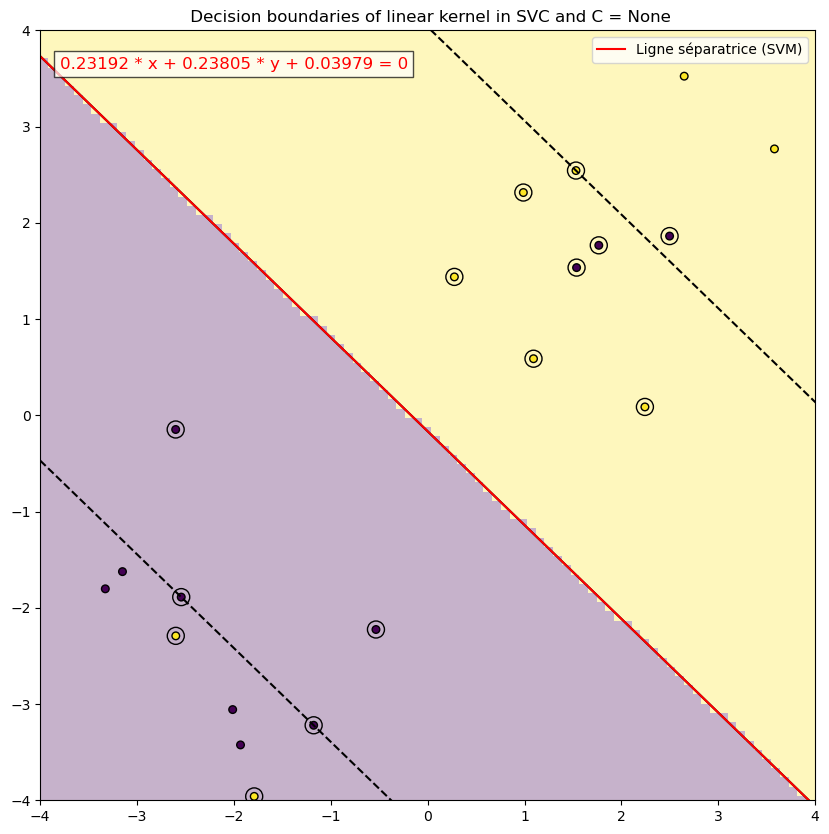

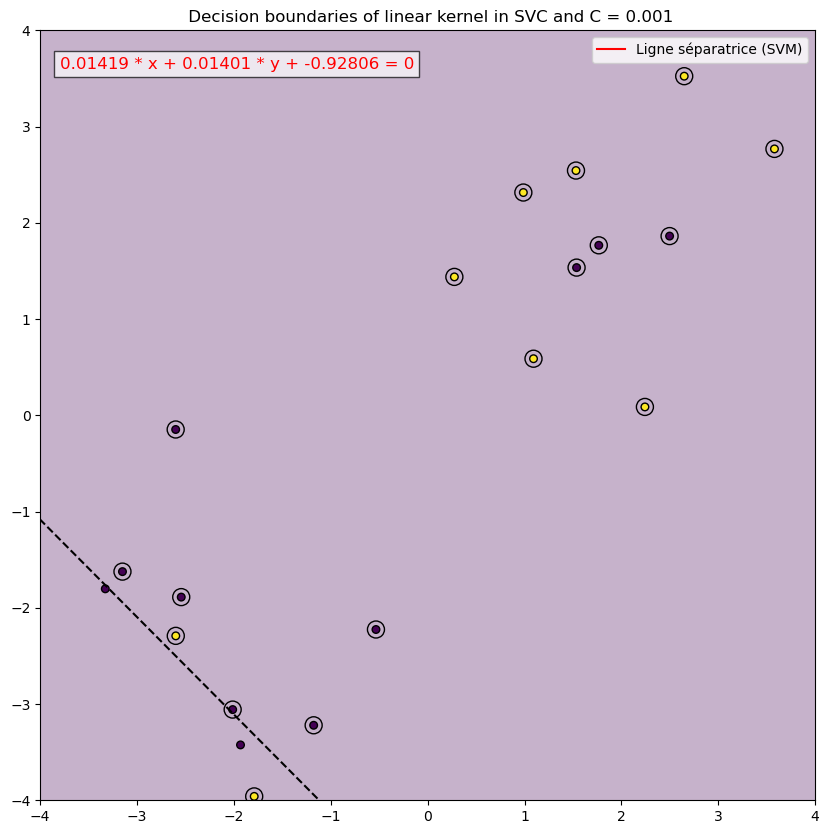

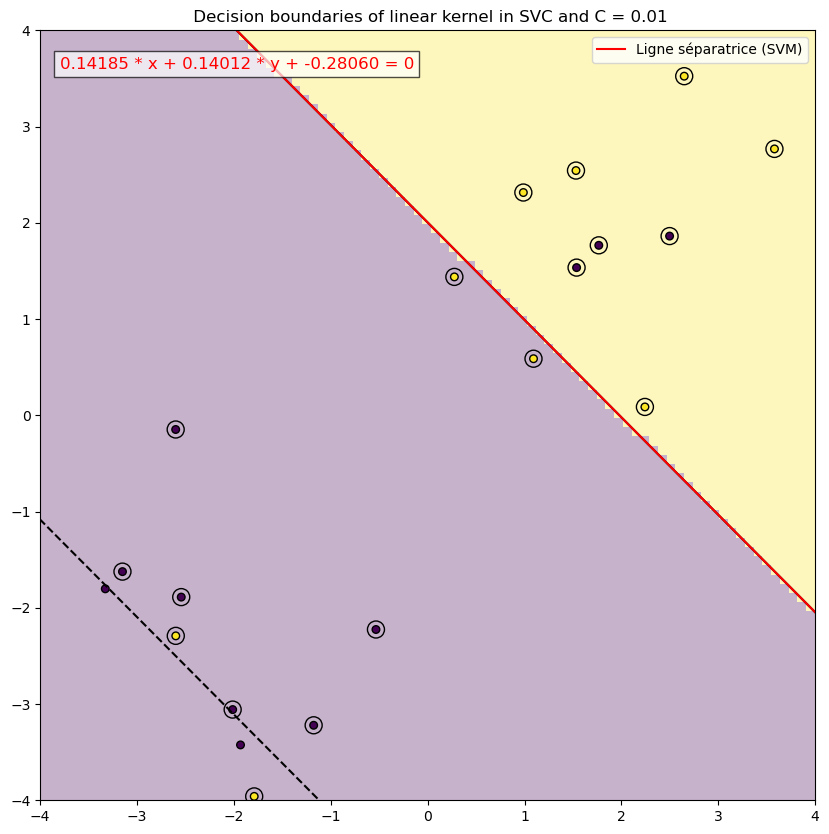

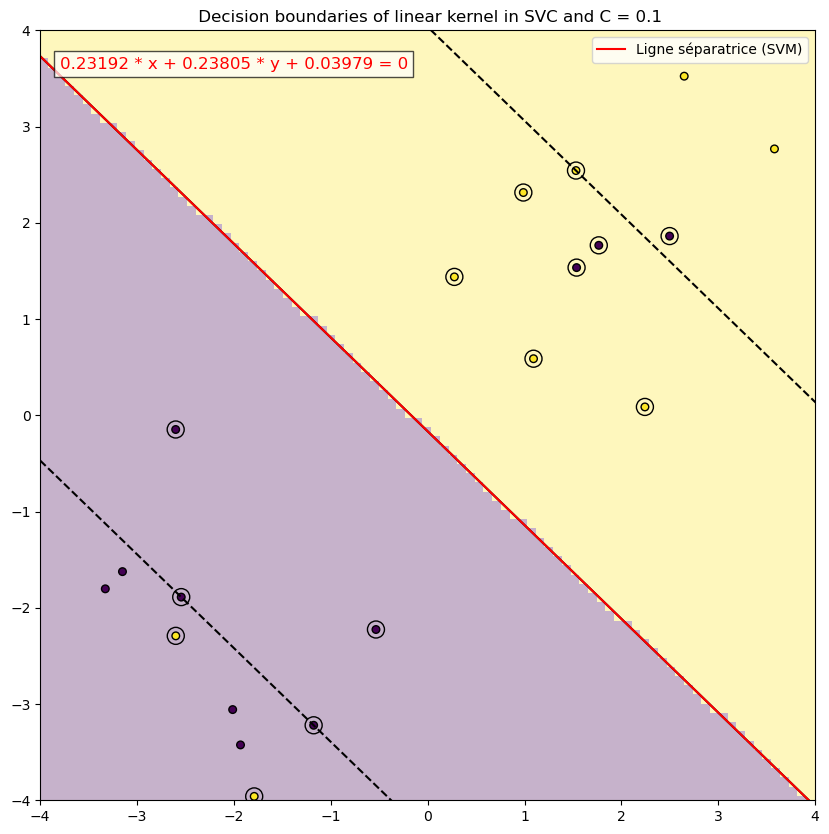

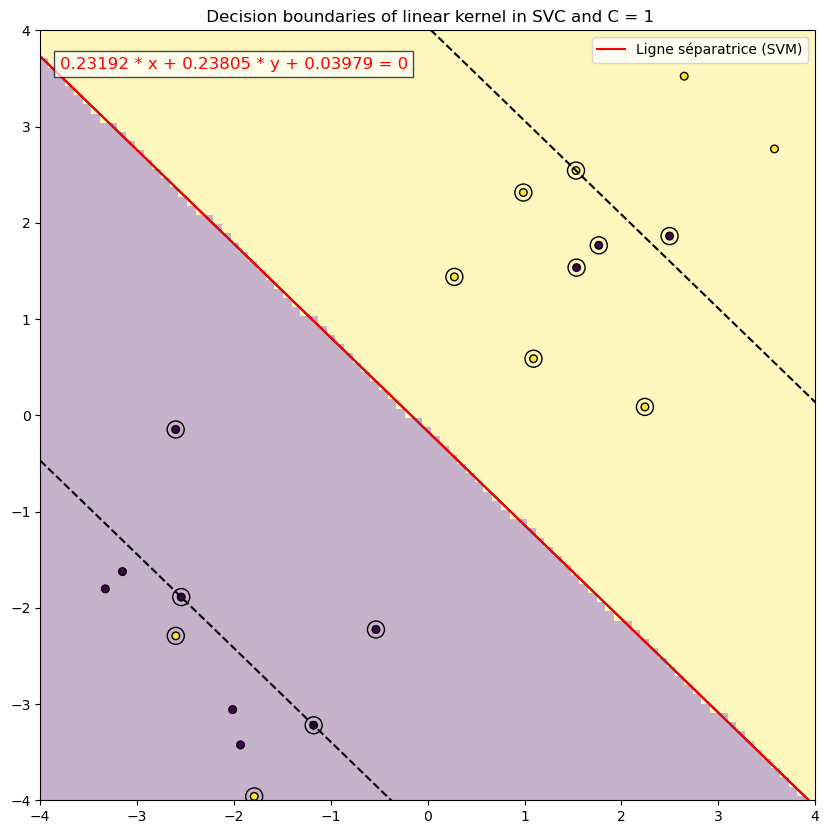

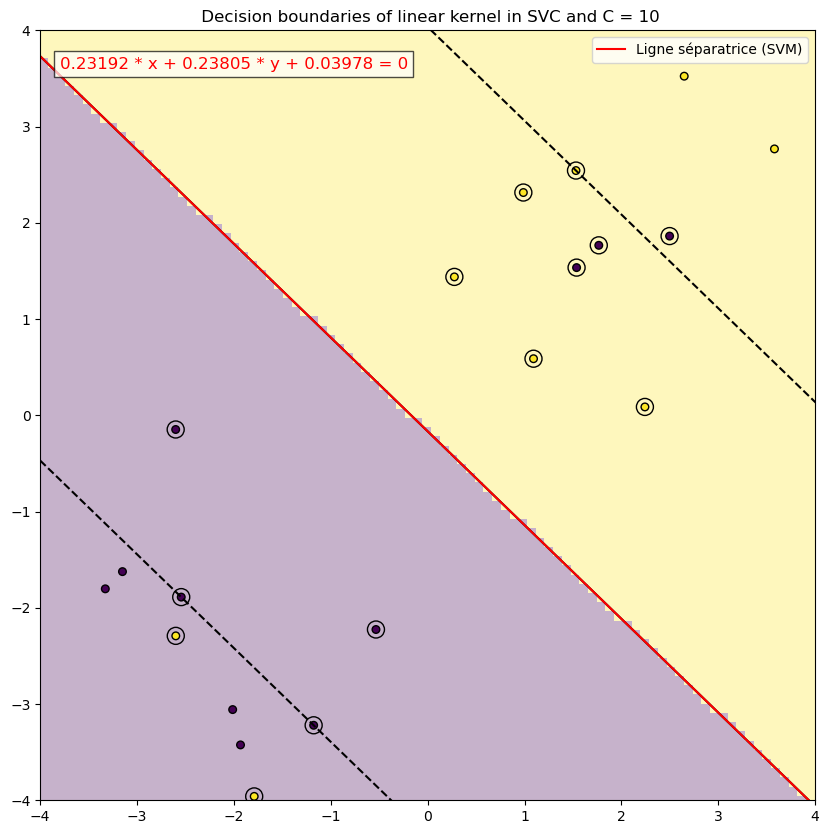

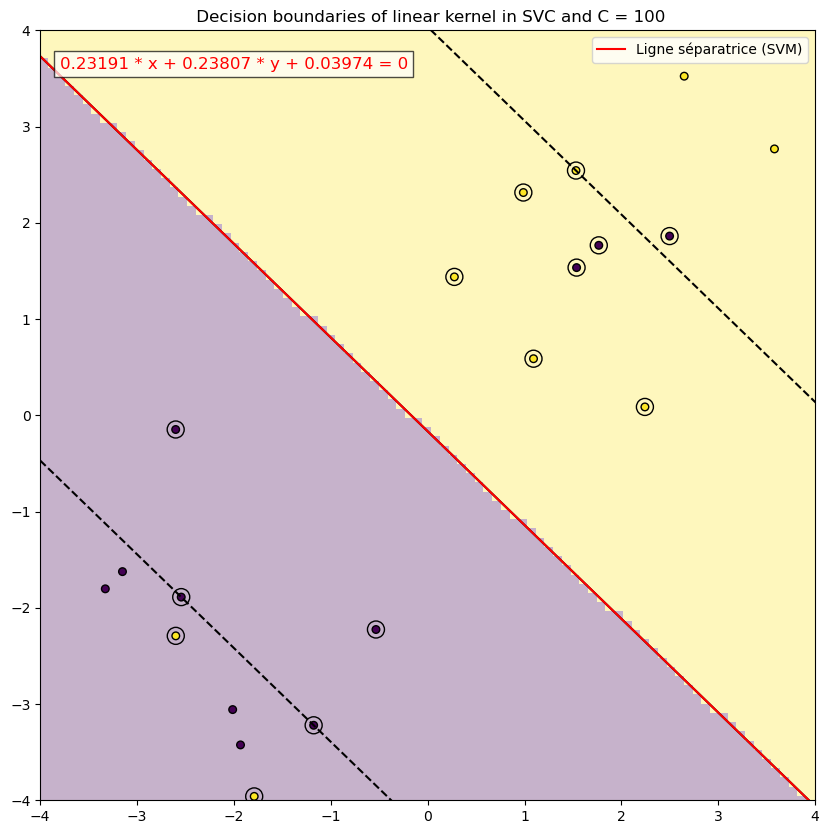

In [5]:
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
        X, y, kernel, C=None, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    if C is None:
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)
    else:
        clf = svm.SVC(kernel=kernel, gamma=2, C=C).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 10))
    x_min, x_max, y_min, y_max = -4, 4, -4, 4
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC and C = {C}")
    else:
        ax.set_title(kernel)
    
    # Vérifier si le kernel est linéaire (sinon coef_ n'existe pas)
    if kernel == "linear":
        w = clf.coef_[0]
        b = clf.intercept_[0]

        # Définition de la plage des x
        x_min, x_max = ax.get_xlim()
        x_vals = np.linspace(x_min, x_max, 100)
        y_vals = -(w[0] * x_vals + b) / w[1]

        # Tracé de la ligne séparatrice
        ax.plot(x_vals, y_vals, "r-", label="Ligne séparatrice (SVM)")

        # Ajouter l'équation de la frontière sur le graphique
        equation_text = f"{w[0]:.5f} * x + {w[1]:.5f} * y + {b:.5f} = 0"
        print(f"Modèle entraîné avec C={C} : w1={w[0]}, w2={w[1]}, b={b}")
        ax.text(x_min + 0.2, y_max - 0.4, equation_text, fontsize=12, color="red", bbox=dict(facecolor='white', alpha=0.7))

        ax.legend()
        
    if ax is None:
        plt.show()

# Définition des valeurs de C à tester
C_values = [None, 0.001, 0.01, 0.1, 1, 10, 100]
for C in C_values:
    plot_training_data_with_decision_boundary(X, y_flipped, "linear", C)
